In [1]:
from utils import get_stock
import datetime
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn
%matplotlib inline  

In [2]:
start = datetime.datetime(2014, 1, 1)
yahoo = get_stock('YHOO', start, datetime.datetime(2015,7,2))
yhoo = yahoo.Open[:-1]

In [3]:
results = sm.tsa.ARMA(yhoo, (3,0)).fit()

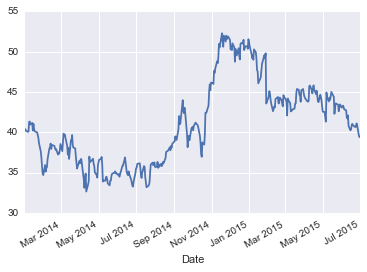

In [4]:
yhoo.plot()

In [5]:
yhoo.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15', 
               ...
               '2015-06-18', '2015-06-19', '2015-06-22', '2015-06-23',
               '2015-06-24', '2015-06-25', '2015-06-26', '2015-06-29',
               '2015-06-30', '2015-07-01'],
              dtype='datetime64[ns]', name=u'Date', length=377, freq=None, tz=None)

In [6]:
error = yhoo - results.predict(dynamic=True)

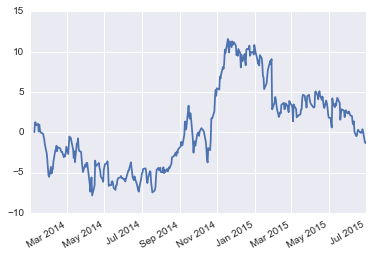

In [7]:
error.plot()

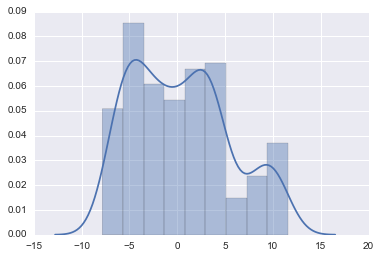

In [8]:
seaborn.distplot(error[error.notnull()])

In [9]:
yhoo

Date
2014-01-02    40.369999
2014-01-03    40.160000
2014-01-06    40.049999
2014-01-07    40.080002
2014-01-08    41.290001
2014-01-09    41.330002
2014-01-10    40.950001
2014-01-13    41.160000
2014-01-14    40.209999
2014-01-15    41.060001
2014-01-16    40.430000
2014-01-17    40.119999
2014-01-21    39.980000
2014-01-22    39.660000
2014-01-23    39.310001
2014-01-24    38.669998
2014-01-27    37.599998
2014-01-28    36.830002
2014-01-29    35.770000
2014-01-30    34.889999
2014-01-31    34.689999
2014-02-03    35.939999
2014-02-04    35.110001
2014-02-05    35.599998
2014-02-06    35.650002
2014-02-07    36.650002
2014-02-10    38.000000
2014-02-11    38.150002
2014-02-12    38.599998
2014-02-13    37.919998
                ...    
2015-05-20    42.279999
2015-05-21    43.060001
2015-05-22    43.580002
2015-05-26    43.410000
2015-05-27    42.599998
2015-05-28    43.060001
2015-05-29    43.450001
2015-06-01    43.049999
2015-06-02    43.180000
2015-06-03    43.299999
2015-06-04 

In [10]:
today = datetime.date(2015, 7, 2)

In [11]:
today

datetime.date(2015, 7, 2)

In [12]:
results.predict(dynamic=True)

2014-01-07    40.069381
2014-01-08    40.082527
2014-01-09    40.091818
2014-01-10    40.101236
2014-01-13    40.110617
2014-01-14    40.119848
2014-01-15    40.128939
2014-01-16    40.137895
2014-01-17    40.146719
2014-01-21    40.155411
2014-01-22    40.163974
2014-01-23    40.172410
2014-01-24    40.180721
2014-01-27    40.188908
2014-01-28    40.196974
2014-01-29    40.204920
2014-01-30    40.212748
2014-01-31    40.220459
2014-02-03    40.228056
2014-02-04    40.235541
2014-02-05    40.242914
2014-02-06    40.250177
2014-02-07    40.257333
2014-02-10    40.264382
2014-02-11    40.271327
2014-02-12    40.278168
2014-02-13    40.284908
2014-02-14    40.291548
2014-02-18    40.298089
2014-02-19    40.304533
                ...    
2015-05-20    40.728080
2015-05-21    40.728137
2015-05-22    40.728193
2015-05-26    40.728248
2015-05-27    40.728302
2015-05-28    40.728356
2015-05-29    40.728409
2015-06-01    40.728461
2015-06-02    40.728512
2015-06-03    40.728563
2015-06-04    40

In [13]:
yhoo.count()

377

In [14]:
results.params

const         40.731913
ar.L1.Open     0.961168
ar.L2.Open    -0.006145
ar.L3.Open     0.029325
dtype: float64

In [20]:
results.forecast(50)

(array([ 39.48121718,  39.49824862,  39.51654108,  39.53464078,
         39.55242466,  39.56994315,  39.58720286,  39.6042062 ,
         39.62095693,  39.63745886,  39.65371566,  39.66973099,
         39.68550843,  39.70105152,  39.71636373,  39.7314485 ,
         39.7463092 ,  39.76094916,  39.77537167,  39.78957994,
         39.80357717,  39.81736649,  39.83095098,  39.84433369,
         39.85751762,  39.87050571,  39.88330089,  39.895906  ,
         39.90832388,  39.92055731,  39.93260903,  39.94448173,
         39.95617807,  39.96770069,  39.97905214,  39.99023499,
         40.00125172,  40.01210482,  40.02279671,  40.03332978,
         40.04370639,  40.05392887,  40.06399951,  40.07392057,
         40.08369425,  40.09332276,  40.10280825,  40.11215285,
         40.12135864,  40.13042769]),
 array([ 0.85808056,  1.19018072,  1.42710257,  1.62490381,  1.79646862,
         1.94856299,  2.08558634,  2.21046295,  2.32525359,  2.43148295,
         2.53031905,  2.62268165,  2.70931162,  

In [19]:
yahoo

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,40.369999,40.490002,39.310001,39.590000,21504200,39.590000
2014-01-03,40.160000,40.439999,39.820000,40.119999,15755200,40.119999
2014-01-06,40.049999,40.320000,39.750000,39.930000,12467500,39.930000
2014-01-07,40.080002,41.200001,40.080002,40.919998,14100000,40.919998
2014-01-08,41.290001,41.720001,41.020000,41.020000,18638200,41.020000
2014-01-09,41.330002,41.349998,40.610001,40.919998,12897300,40.919998
2014-01-10,40.950001,41.349998,40.820000,41.230000,8721700,41.230000
2014-01-13,41.160000,41.220001,39.799999,39.990002,16047200,39.990002
2014-01-14,40.209999,41.139999,40.040001,41.139999,14473900,41.139999
